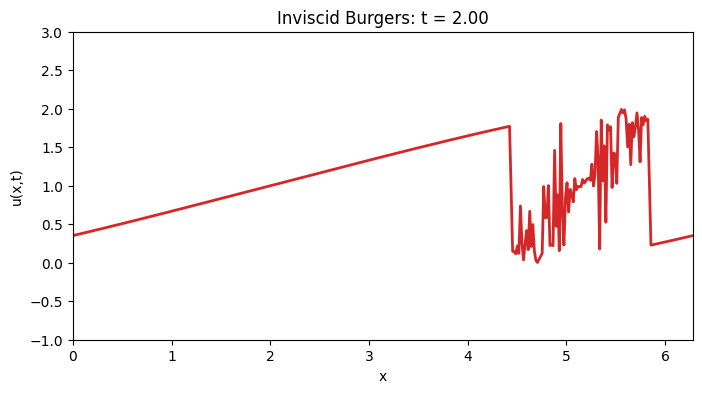

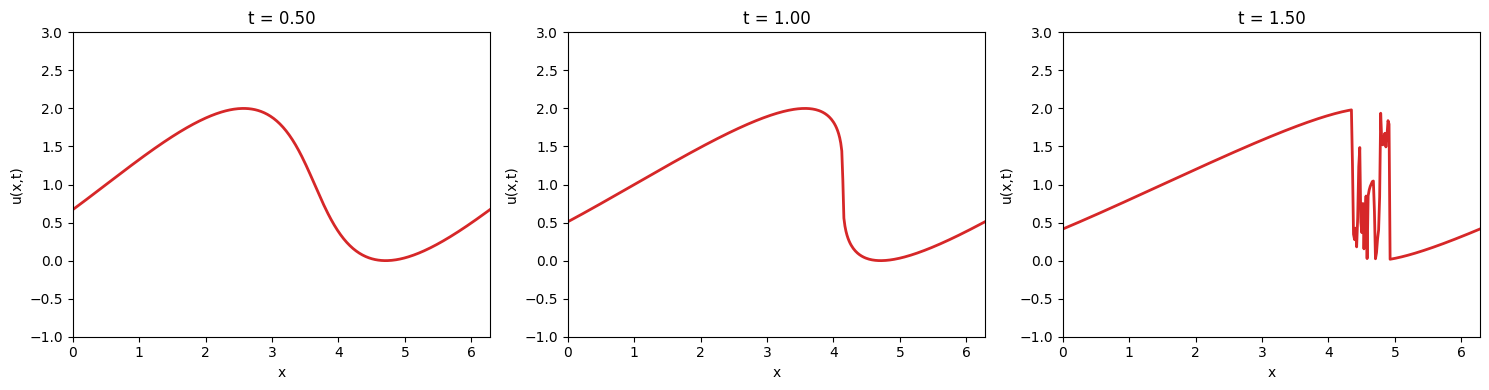

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
# Domain
L = 2*np.pi
Nx = 400
x = np.linspace(0, L, Nx)

# Initial condition
def u0(x):
    return 1.0 + np.sin(x)

# Grid of xi (Lagrangian labels)
xi = np.linspace(0, L, Nx)

# Precompute initial values
u_init = u0(xi)

# Function to compute solution at time t (by tracing characteristics)
def u_xt(x, t):
    # For each xi, compute its position at time t
    x_char = (xi + u_init * t) % L  # periodic wrap-around
    # Interpolate back to Eulerian grid
    return np.interp(x, x_char, u_init, period=L)

# Times to animate
tmax = 2.0
frames = 100
times = np.linspace(0, tmax, frames)

# Prepare plot
fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot(x, u0(x), lw=2, color="tab:red")
ax.set_ylim(-1, 3)
ax.set_xlim(0, L)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Inviscid Burgers Equation (Wave Steepening)")

def animate(i):
    t = times[i]
    u = u_xt(x, t)
    line.set_ydata(u)
    ax.set_title(f"Inviscid Burgers: t = {t:.2f}")
    return (line,)

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=80, blit=True)
HTML(anim.to_html5_video())

# Snapshot plot at 3 times
figs, axes = plt.subplots(1, 3, figsize=(15, 4))

snapshot_times = [0.5, 1.0, 1.5]
for j, t in enumerate(snapshot_times):
    u = u_xt(x, t)
    axes[j].plot(x, u, lw=2, color="tab:red")
    axes[j].set_xlim(0, L)
    axes[j].set_ylim(-1, 3)
    axes[j].set_xlabel("x")
    axes[j].set_ylabel("u(x,t)")
    axes[j].set_title(f"t = {t:.2f}")

plt.tight_layout()
plt.show()


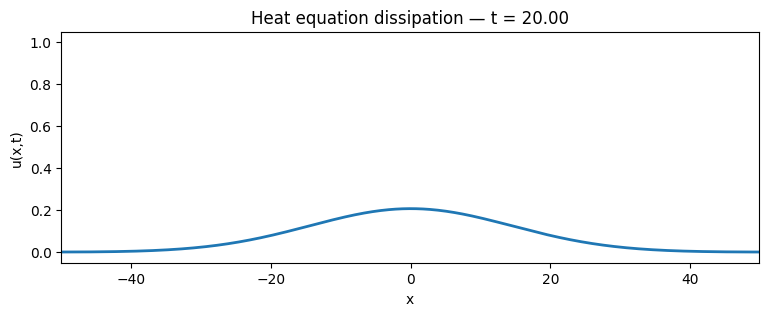

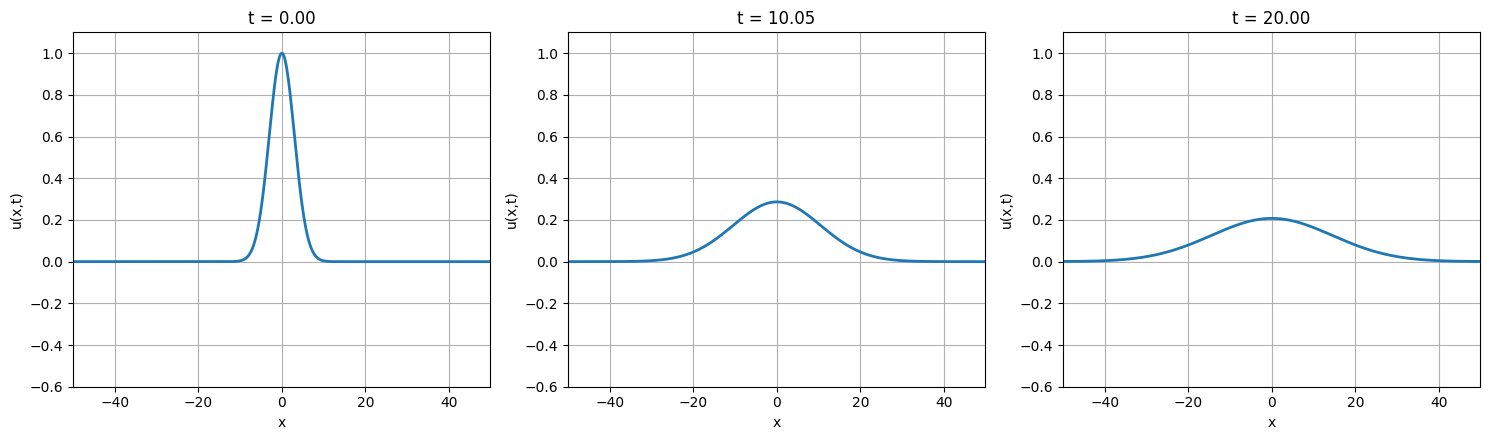

In [8]:
# Dissipative example: Heat equation u_t = nu * u_xx
# Exact spectral solution: u_hat(k,t) = u_hat(k,0) * exp(-nu * k^2 * t)
# We'll animate the real solution for a Gaussian initial pulse decaying and broadening.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Domain and grid
L = 100.0
Nx = 512
x = np.linspace(-L/2, L/2, Nx, endpoint=False)
dx = x[1] - x[0]

# Wavenumbers for FFT (angular)
k = 2 * np.pi * np.fft.fftfreq(Nx, d=dx)

# Physical parameters
nu = 5  # viscosity / diffusivity (controls dissipation rate)

# Initial condition: localized Gaussian pulse
sigma = 3.0
u0 = np.exp(-0.5 * (x / sigma)**2)  # centered at 0, amplitude 1

# Fourier transform initial condition
u0_hat = np.fft.fft(u0)

# Time parameters for animation
tmax = 20.0
frames = 200
times = np.linspace(0, tmax, frames)

# Precompute dissipative factors and build solutions
decay = np.exp(-nu * (k**2)[:, None] * times[None, :])  # shape (Nx, frames)
solutions = np.real(np.fft.ifft(u0_hat[:, None] * decay, axis=0))

# Plot setup
fig, ax = plt.subplots(figsize=(9,3))
line, = ax.plot(x, solutions[:,0], lw=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Dissipative evolution (Heat equation): u_t = nu u_xx')

def animate(i):
    line.set_ydata(solutions[:, i])
    ax.set_title(f'Heat equation dissipation — t = {times[i]:.2f}')
    return (line,)

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=40, blit=True)

# Display animation inline
HTML(anim.to_html5_video())

figs, axes = plt.subplots(1, 3, figsize=(15, 4.5))

snapshots = [0, frames//2, frames-1]   # indices for t=0, t=tmax/2, t=tmax
titles = [f't = {times[idx]:.2f}' for idx in snapshots]

for ax, idx, title in zip(axes, snapshots, titles):
    ax.plot(x, solutions[:, idx], lw=2)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-0.6, 1.1)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

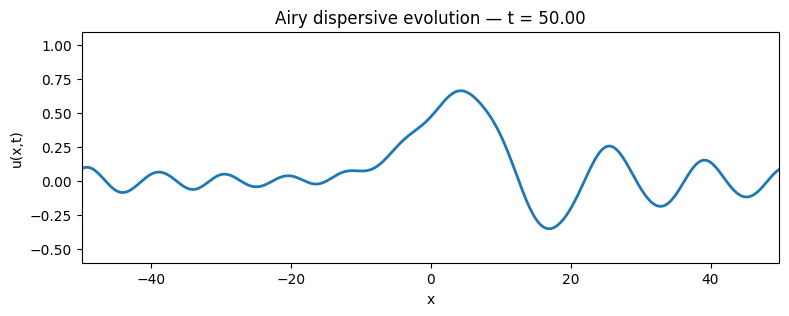

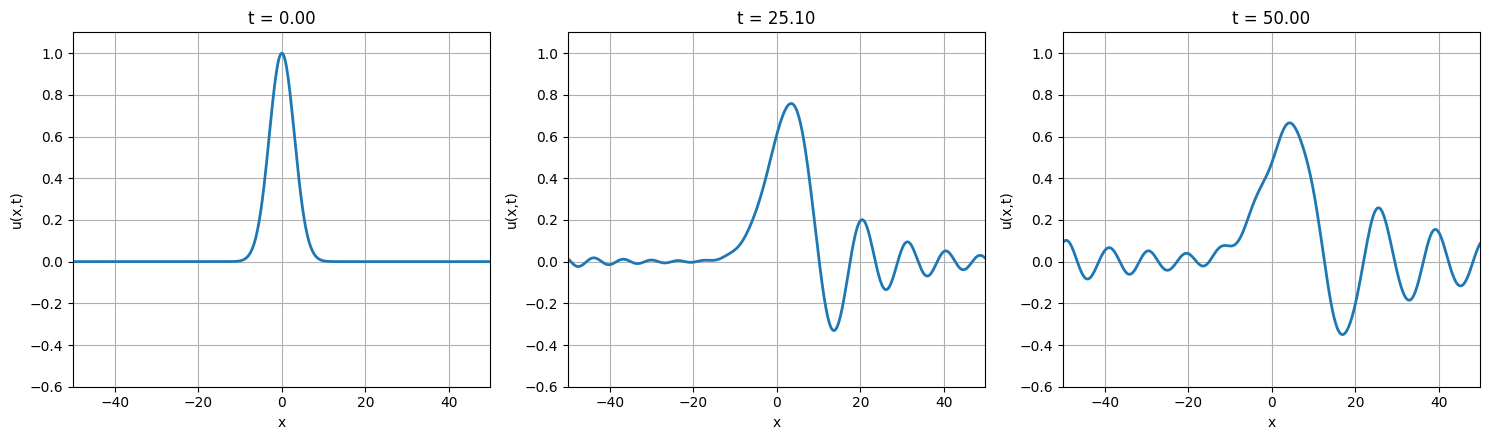

In [3]:
# Linear dispersive example: Airy equation (u_t + u_xxx = 0)
# Exact spectral solution: u_hat(k,t) = u_hat(k,0) * exp(-1j * k^3 * t)
# We'll evolve in Fourier space and animate the real part of u(x,t).
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Domain and grid
L = 100.0
Nx = 512
x = np.linspace(-L/2, L/2, Nx, endpoint=False)
dx = x[1] - x[0]

# Wavenumbers for FFT (angular)
k = 2 * np.pi * np.fft.fftfreq(Nx, d=dx)  # angular frequency choices

# Initial condition: localized Gaussian pulse
sigma = 3.0
u0 = np.exp(-0.5 * (x / sigma)**2)  # centered at 0, amplitude 1

# Fourier transform initial condition
u0_hat = np.fft.fft(u0)

# Time parameters for animation
tmax = 50.0
frames = 250
times = np.linspace(0, tmax, frames)

# Precompute spectral phase factors for all times to speed up
phase = np.exp(-1j * np.outer(k**3, times))  # shape (Nx, frames)
# Build solution in physical space for each time (real part)
solutions = np.real(np.fft.ifft(u0_hat[:, None] * phase, axis=0))

# Plot setup
fig, ax = plt.subplots(figsize=(9,3))
line, = ax.plot(x, solutions[:,0], lw=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-0.6, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Linear dispersive wave (Airy equation): u_t + u_{xxx} = 0')

def animate(i):

    line.set_ydata(solutions[:, i])
    ax.set_title(f'Airy dispersive evolution — t = {times[i]:.2f}')
    return (line,)

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=40, blit=True)

# Display animation inline
HTML(anim.to_html5_video())

figs, axes = plt.subplots(1, 3, figsize=(15, 4.5))

snapshots = [0, frames//2, frames-1]   # indices for t=0, t=tmax/2, t=tmax
titles = [f't = {times[idx]:.2f}' for idx in snapshots]

for ax, idx, title in zip(axes, snapshots, titles):
    ax.plot(x, solutions[:, idx], lw=2)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-0.6, 1.1)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()